# Adrien HANS & Tanguy JEANNEAU

## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la

#importing the necessary modules from scikit-learn :
#LDA : 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#QDA : 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

## *Exploring the data sets :*

In [3]:
#We show the first 5 rows of both data sets : 
#firstly the training set :
train[:5]

array([[ 2.        , -0.72221141,  2.00447087],
       [ 2.        , -0.92467912,  0.48366928],
       [ 2.        , -0.76602281,  0.79432891],
       [ 2.        , -0.07328948,  0.96992915],
       [ 1.        , -1.39291198,  0.99969709]])

In [4]:
#Then the test set : 
test[:5]

array([[ 2.        ,  0.54837733,  1.2213453 ],
       [ 2.        , -0.51618236,  1.56239592],
       [ 2.        , -0.92877833,  0.92107217],
       [ 2.        ,  0.07000405,  0.61976747],
       [ 2.        ,  0.26702843,  1.10944064]])

In [5]:
#In order to make easier the computation, we separate data by class : 

#For the training set : 
train1 = train[train[:,0]==1]
train2 = train[train[:,0]==2]
#For the test set : 
test1 = test[test[:,0]==1]
test2 = test[test[:,0]==2]

### Plotting the distribution of the test and the training sets by label according to their 2D coordinates : 

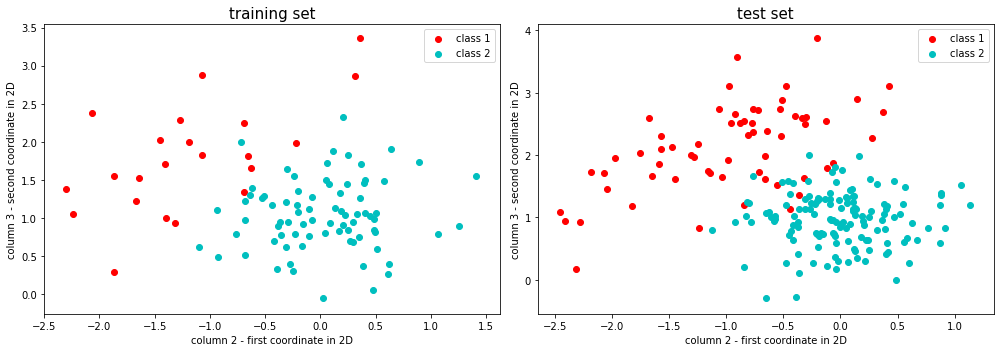

In [6]:
fig=figure(figsize=(14,5))
plt.subplot(121)
plt.scatter(train1[:,1],train1[:,2],label='class 1',color='r')
plt.scatter(train2[:,1],train2[:,2],label='class 2',color='c')
plt.xlabel('column 2 - first coordinate in 2D')
plt.ylabel('column 3 - second coordinate in 2D')
plt.title('training set',size=15)
plt.legend()

plt.subplot(122)
plt.scatter(test1[:,1],test1[:,2],label='class 1',color='r')
plt.scatter(test2[:,1],test2[:,2],label='class 2',color='c')
plt.xlabel('column 2 - first coordinate in 2D')
plt.ylabel('column 3 - second coordinate in 2D')
plt.title('test set',size=15)
plt.legend()
plt.tight_layout()

plt.show()

## *We implement a classifier using LDA of the data set :*

### Formulas and maths behind LDA classification :

We can give the following definitions :

Weights $\pi_k$ of each class: 
\begin{align*}
\pi_k=\frac{N_k}{N}
\end{align*}

with $N_k$ the size of the class k and $N$ the size of the entire set 


Empirical means $\mu_k$ of each class :
\begin{align*}
\mu_k=\frac{1}{N_k}\sum_{n \in C_k} x_n
\end{align*}

And $\Sigma$ :

\begin{align*}
\Sigma=\sum_{k=1}^K \frac{N_k}{N} S_k
\end{align*}
with 
\begin{align*}
S_k=\frac{1}{N_k}\sum_{n\in C_k} (x_n - \mu_k)(x_n-\mu_k)^T
\end{align*}

Giving the log-probability of belonging to a class $y_k(x)$ for **LDA** :
\begin{align*}
y_k(x)=x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + ln(\pi_k)
\end{align*}

### Coding LDA classifier : 
We use the steps as defined before : 

In [7]:
def LDA_parameters(train):
    """
    The function LDA_parameters permits to calculate the parameters needed 
    to compute a Linear Discriminant Analysis (LDA) from a training set 

    @Inputs : 
        -train : the training set 

    @Outputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma : the parameters permitting to compute LDA
    """
    
    
    #We separate the data by class :
    train1 = train[train[:,0]==1]
    train2 = train[train[:,0]==2]
    
    #We compute the lengths N, N1 and N2 :
    N  = train.shape[0]
    N1 = train1.shape[0]
    N2 = train2.shape[0]

    #coordinates of the points belonging to classes 1 and 2 : 
    X1 = train[train[:,0]==1][:,1:] 
    X2 = train[train[:,0]==2][:,1:]


    #We estimate the weights pi_1 and pi_2 for each class :
    pi_1=N1/N
    pi_2=N2/N

    #We estimate empirical means mu_1 and mu_2 for each class : 
    mu_1 = X1.mean(axis=0)
    mu_2 = X2.mean(axis=0)

    #We estimate empirical covariance matrices sigma_1 and sigma_2 for each class

    sigma_1 =  (X1 - mu_1).T.dot(X1 - mu_1)/N1
    sigma_2 =  (X2 - mu_2).T.dot(X2- mu_2)/N2

    #Computation of the common averaged covariance sigma (average of intra-class covariances):
    sigma = (N1*sigma_1 + N2*sigma_2)/N
    
    return pi_1,pi_2,mu_1,mu_2,sigma

def LDA_decision(pi_1,pi_2,mu_1,mu_2,sigma, x):
    """
    The function LDA_decision computes the decision by a LDA given its parameters 
    for a single individual.

    @Inputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma : the parameters of the LDA
        - x : the individual one wants to assess a decision 

    @Outputs : 
        -the decision (1 or 2) for class 1 or class 2
    """
    #We compute the inverse of sigma :
    Isigma=inv(sigma)
    #We compute the log-probabilities of belonging to a class :
    y1=x.T.dot(Isigma).dot(mu_1) - 0.5*mu_1.T.dot(Isigma).dot(mu_1) +np.log(pi_1)
    y2=x.T.dot(Isigma).dot(mu_2) - 0.5*mu_2.T.dot(Isigma).dot(mu_2) +np.log(pi_2)
    
    if y1 > y2:
        return 1
    return 2


def LDA_list_decision(pi_1,pi_2,mu_1,mu_2,sigma, X):
    """
    The function LDA_list_decision computes decisions by a LDA given its parameters 
    for several individuals by calling the function LDA_decision for each invidual.

    @Inputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma : the parameters of the LDA
        -X : the list of individuals one wants to assess decisions 

    @Outputs : 
        -L : the list of the decisions given by LDA for the set X
    """
    L=[]
    for x in X:
        L.append(LDA_decision(pi_1,pi_2,mu_1,mu_2,sigma, x))
    return L

**Results** : 

We calculate the parameters of our model : 

In [8]:
pi_1,pi_2,mu_1,mu_2,sigma = LDA_parameters(train)
print("pi_1 = ",pi_1)
print("pi_2 = ",pi_2)
print("mu_1 = ",mu_1)
print("mu_2 = ",mu_2)
print("sigma = ",sigma)

pi_1 =  0.22
pi_2 =  0.78
mu_1 =  [-1.18350693  1.78655437]
mu_2 =  [0.02868973 1.04424548]
sigma =  [[0.3030754  0.08284337]
 [0.08284337 0.27017769]]


## *We implement a classifier using QDA of the data set :*

### Formulas and maths behind QDA classifier : 

Just like with LDA, we can give the following definitions :

Weights $\pi_k$ of each class: 
\begin{align*}
\pi_k=\frac{N_k}{N}
\end{align*}

with $N_k$ the size of the class k and $N$ the size of the entire set 


Empirical means $\mu_k$ of each class :
\begin{align*}
\mu_k=\frac{1}{N_k}\sum_{n \in C_k} x_n
\end{align*}

And $\Sigma$ :

\begin{align*}
\Sigma=\sum_{k=1}^K \frac{N_k}{N} S_k
\end{align*}
with 
\begin{align*}
S_k=\frac{1}{N_k}\sum_{n\in C_k} (x_n - \mu_k)(x_n-\mu_k)^T
\end{align*}

Giving the log-probability of belonging to a class $y_k(x)$ for **QDA**:
\begin{align*}
y_k(x)=-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+ln(\pi_k)-\frac{1}{2}ln|\Sigma_k|
\end{align*}

In [9]:
def QDA_parameters(train):
    """
    The function QDA_parameters permits to calculate the parameters needed 
    to compute a Quadratic Discriminant Analysis (QDA) from a training set 

    @Inputs : 
        -train : the training set 

    @Outputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2 : the parameters permitting to compute QDA
    """
    train1 = train[train[:,0]==1]
    train2 = train[train[:,0]==2]
    
    #We compute the lengths N, N1 and N2 :
    N  = train.shape[0]
    N1 = train1.shape[0]
    N2 = train2.shape[0]

    #coordinates of the points belonging to classes 1 and 2 : 
    X1 = train[train[:,0]==1][:,1:] 
    X2 = train[train[:,0]==2][:,1:]


    #We estimate the weights pi_1 and pi_2 for each class :
    pi_1=N1/N
    pi_2=N2/N

    #We estimate empirical means mu_1 and mu_2 for each class : 
    mu_1 = X1.mean(axis=0)
    mu_2 = X2.mean(axis=0)

    #We estimate empirical covariance matrices sigma_1 and sigma_2 for each class

    sigma_1 =  (X1 - mu_1).T.dot(X1 - mu_1)/N1
    sigma_2 =  (X2 - mu_2).T.dot(X2- mu_2)/N2
 
    return pi_1, pi_2, mu_1, mu_2, sigma_1, sigma_2

def QDA_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, x):
    """
    The function QDA_decision computes the decision by a QDA given its parameters 
    for a single individual.

    @Inputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2 : the parameters of the QDA
        - x : the individual one wants to assess a decision 

    @Outputs : 
        -the decision (1 or 2) for class 1 or class 2
    """
    #Computing the log-probability of belonging to each class:
    y1=-0.5*(x-mu_1).T.dot(inv(sigma_1)).dot(x-mu_1)+np.log(pi_1)-0.5*np.log(np.linalg.norm(sigma_1))
    y2=-0.5*(x-mu_2).T.dot(inv(sigma_2)).dot(x-mu_2)+np.log(pi_2)-0.5*np.log(np.linalg.norm(sigma_2))
    if y1 > y2:
        return 1
    return 2

def QDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, X):
    """
    The function QDA_list_decision computes decisions by a QDA given its parameters 
    for several individuals by calling the function QDA_decision for each invidual.

    @Inputs : 
        -pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2 : the parameters of the QDA
        -X : the list of individuals one wants to assess decisions 

    @Outputs : 
        -L : the list of the decisions given by QDA for the set X
    """
    L=[]
    for x in X:
        L.append(QDA_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, x))
    return L

**Results** : 

We calculate the parameters of our model : 

In [10]:
pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2 = QDA_parameters(train)
print("pi_1 = ",pi_1)
print("pi_2 = ",pi_2)
print("mu_1 = ",mu_1)
print("mu_2 = ",mu_2)
print("sigma_1 = ",sigma_1)
print("sigma_2 = ",sigma_2)

pi_1 =  0.22
pi_2 =  0.78
mu_1 =  [-1.18350693  1.78655437]
mu_2 =  [0.02868973 1.04424548]
sigma_1 =  [[0.51664642 0.30792087]
 [0.30792087 0.48765965]]
sigma_2 =  [[0.24283742 0.01935998]
 [0.01935998 0.20883663]]


### *In each case (LDA & QDA), we show the decision boundary and compute the error rate respectively for the training set and the test set.*

In [11]:
#We define the matrix of features for the training set and the vector of targets :
X_train=train[:,1:]
y_train=train[:,0]
#Defining the same thing for the test set : 
X_test=test[:,1:]
y_test=test[:,0]

**Error Rates :** 

**1) on the test set :**

In [12]:
#Calcul of the parameters : 
pi_1,pi_2,mu_1,mu_2,sigma=LDA_parameters(train)
#Predicting the results via LDA : 
y_test_pred_LDA=LDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma, X_test)
#Initializing the error : 
error_LDA_test=0
for i in range(y_test.shape[0]):
    if y_test[i] != y_test_pred_LDA[i]:
        error_LDA_test+=1
error_rate_LDA_test=error_LDA_test/y_test.shape[0]
print('Error rate for LDA on the test set : ', error_rate_LDA_test)

Error rate for LDA on the test set :  0.055


In [13]:
#Calul of the parameters : 
pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2=QDA_parameters(train)
#Predicting the results via QDA : 
y_test_pred_QDA=QDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, X_test)
#initializing the error : 
error_QDA_test=0
for i in range(y_test.shape[0]):
    if y_test[i] != y_test_pred_QDA[i]:
        error_QDA_test+=1
error_rate_QDA_test =error_QDA_test/y_test.shape[0]
print('Error rate for QDA on the test set : ',error_rate_QDA_test )

Error rate for QDA on the test set :  0.05


**2) Error rate on the training set :**

In [14]:
pi_1,pi_2,mu_1,mu_2,sigma=LDA_parameters(train)
#Predicting the results via LDA : 
y_train_pred_LDA=LDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma, X_train)
#Initializing the error : 
error_LDA_train=0
for i in range(y_train.shape[0]):
    if y_train[i] != y_train_pred_LDA[i]:
        error_LDA_train+=1
error_rate_LDA_train=error_LDA_train/y_train.shape[0]
print('Error rate for LDA on the training set : ', error_rate_LDA_train)

Error rate for LDA on the training set :  0.03


In [15]:
#Calul of the parameters : 
pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2=QDA_parameters(train)
#Predicting the results via QDA : 
y_train_pred_QDA=QDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, X_train)
#initializing the error : 
error_QDA_train=0
for i in range(y_train.shape[0]):
    if y_train[i] != y_train_pred_QDA[i]:
        error_QDA_train+=1
error_rate_QDA_train=error_QDA_train/y_train.shape[0]
print('Error rate for QDA on the training set : ', error_rate_QDA_train)

Error rate for QDA on the training set :  0.05


### Graphical representation :

#### LDA

To plot the region of decision for LDA on the training and on the test sets, we use the code below, inspired by the code that was given :

In [16]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  

x = np.array([[x1[i],x2[j]] for i in range(Nx1) for j in range(Nx2)]) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each element of x :
pi_1,pi_2,mu_1,mu_2,sigma=LDA_parameters(train)
class_L=np.array(LDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma, x))
class_L1 = x[class_L == 1]
class_L2 = x[class_L == 2]

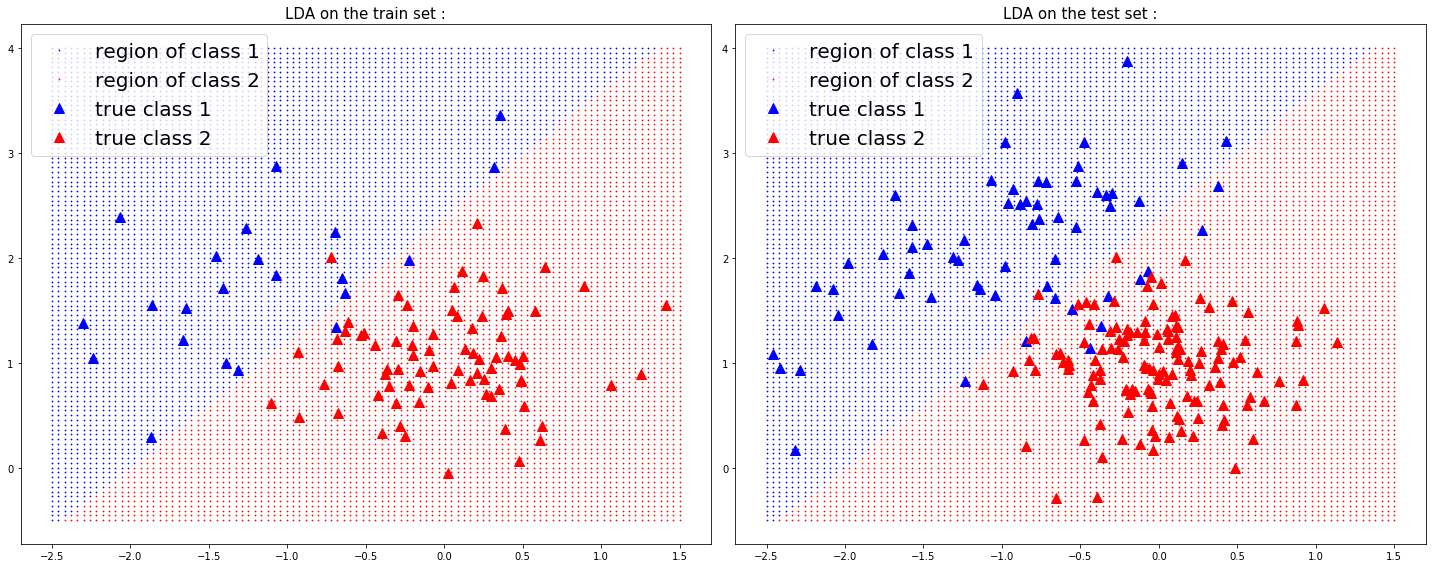

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Plotting both regions of decision :
plt.plot(class_L1[:,0], class_L1[:,1], 'b.', markersize = 1.5,label='region of class 1')
plt.plot(class_L2[:,0], class_L2[:,1], 'r.', markersize = 1.5,label='region of class 2')
#Plotting the true values for the train set : 
plt.plot(train1[:,1],train1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(train2[:,1], train2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')

plt.title('LDA on the train set :',size=15)
plt.legend(prop={'size': 20})

plt.subplot(122)
#Plotting both regions of decision : 
plt.plot(class_L1[:,0], class_L1[:,1], 'b.', markersize = 1.5,label='region of class 1')
plt.plot(class_L2[:,0], class_L2[:,1], 'r.', markersize = 1.5,label='region of class 2')
#Plotting the true values for the test set : 
plt.plot(test1[:,1],test1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(test2[:,1], test2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')
plt.title('LDA on the test set :',size=15)
plt.legend(prop={'size': 20})

plt.tight_layout()
plt.show()

#### QDA

To plot the region of decision for QDA on the training and on the test sets, we use the code below, inspired by the code that was given :

In [18]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  

x = np.array([[x1[i],x2[j]] for i in range(Nx1) for j in range(Nx2)]) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each element of x :
pi_1,pi_2,mu_1,mu_2,sigma_1,sigma_2=QDA_parameters(train)
class_L=np.array(QDA_list_decision(pi_1, pi_2, mu_1, mu_2, sigma_1,sigma_2, x))
class_L1 = x[class_L == 1]
class_L2 = x[class_L == 2]

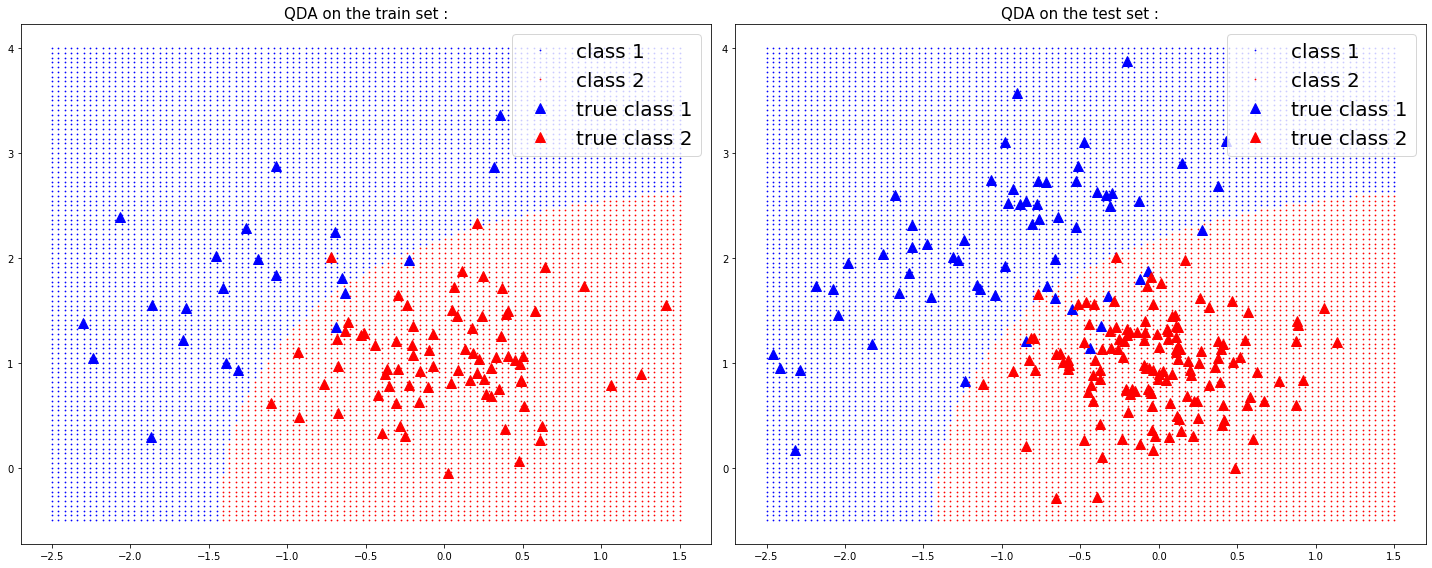

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Plotting both regions of decision :
plt.plot(class_L1[:,0], class_L1[:,1], 'b.', markersize = 1.5,label='class 1')
plt.plot(class_L2[:,0], class_L2[:,1], 'r.', markersize = 1.5,label='class 2')
#Plotting the true values for the train set : 
plt.plot(train1[:,1],train1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(train2[:,1], train2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')
plt.title('QDA on the train set :',size=15)
plt.legend(prop={'size': 20})

plt.subplot(122)
#Plotting both regions of decision :
plt.plot(class_L1[:,0], class_L1[:,1], 'b.', markersize = 1.5,label='class 1')
plt.plot(class_L2[:,0], class_L2[:,1], 'r.', markersize = 1.5,label='class 2')
#Plotting the true values for the test set : 
plt.plot(test1[:,1],test1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(test2[:,1], test2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')
plt.title('QDA on the test set :',size=15)
plt.legend(prop={'size': 20})

plt.tight_layout()
plt.show()

## Comparing the results for QDA and LDA : 

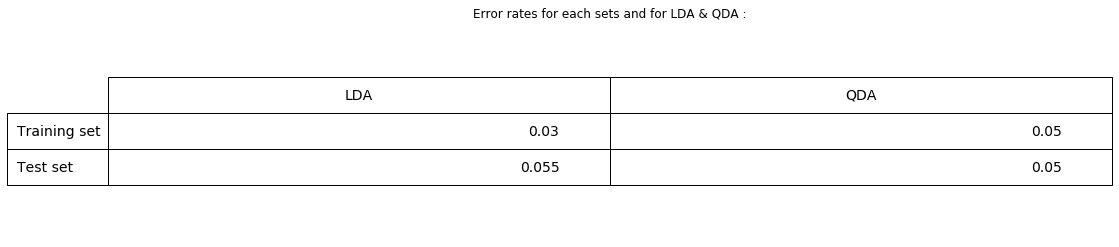

In [20]:
#plotting each error rate for each method :
collabel=("LDA", "QDA")
rowlabels=("Training set","Test set")
results_data=[[error_rate_LDA_train,error_rate_QDA_train],[error_rate_LDA_test,error_rate_QDA_test]]
plt.axis('tight')
plt.axis('off')
the_table = plt.table(cellText=results_data,colLabels=collabel,rowLabels=rowlabels,loc='center')
plt.title('Error rates for each sets and for LDA & QDA :')
#Setting the font size in the table :
the_table.set_fontsize(14)
the_table.scale(3, 3) 
plt.show()

### comparing those results with KNN : 
**We compute the KNN algorithm seen and developed during the course of Python :**

We implement the function knn to compute the K-nearest neighbours algorithm for classification : 
There is two functions : getNeighbours(training, test, k) which gets the k neighbours of a test set, and the function KNN which is able, by calling getNeighbours, to give the target of a test set by looking at the k nearest neighbours of it. 

In [21]:
N_test=test.shape[0]
N_train=train.shape[0]

In [22]:
import operator
"""
The function getNeighbours permits to get the k neighbours of a test_set

@Inputs : 
    -training : list, the trianing set with target in the first column and features on the others
    -test : list, the test 
    -k : int, the number of neighbours of the test set one wants to have. 
    
@Outputs : 
    -neigbours, the list of neighbours 
"""

def getNeighbours(training, test, k):
    distances = [(x, np.linalg.norm(test[1:] - x[1:])) for x in training]
    sorted_distances = sorted(distances,key=operator.itemgetter(1))
    neighbours = [sorted_distances[i][0] for i in range(k)]
    return neighbours

"""
the function KNN(train,test,k) gives targets to the test set by looking at the targets of the k nearest neighbours.

@Inputs : 
    -train : list, the training set with the targets in the first column. 
    -test : list, the test
    -k : int, the number of nearest neighbours one wants to evaluate the target of the test set on. 
@Outputs : 
    -result : float, the target of the test tested. 
"""
def KNN(train,test,k):
    neighbours = np.array(getNeighbours(train, test, k))
    sorted_neighbours = np.sort(neighbours[:,0])
    cat=list(set(sorted_neighbours))
    votes=np.array([[c, len(sorted_neighbours[sorted_neighbours == c])] for c in cat])
    result=sorted(votes, key=operator.itemgetter(1), reverse=True)[0][0]
    return result

#### c. Compute the error rate on the training set and the test set for K = 1,...,30.

In [23]:
#We compute the correctness for each k from 1 to 30 
List_error=[]
n=30
result=0

for k in range(1,n+1):
    nb_errors=0
    for x in test:
        result=KNN(train,x,k)
        if result != x[0]:
            nb_errors+=1
    List_error.append((1-(nb_errors/N_test)) * 100)

We plot the evolution of the correctness with k : 

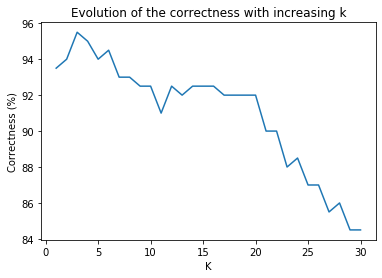

In [24]:
plt.plot([k for k in range(1,n+1)],List_error)
plt.title('Evolution of the correctness with increasing k')
plt.ylabel('Correctness (%)')
plt.xlabel('K')
plt.show()

We show the values in a table : 

In [25]:
for k in range(1,n+1):
    print('k = ', k, 'Correctness = ',List_error[k-1], "%" )

k =  1 Correctness =  93.5 %
k =  2 Correctness =  94.0 %
k =  3 Correctness =  95.5 %
k =  4 Correctness =  95.0 %
k =  5 Correctness =  94.0 %
k =  6 Correctness =  94.5 %
k =  7 Correctness =  93.0 %
k =  8 Correctness =  93.0 %
k =  9 Correctness =  92.5 %
k =  10 Correctness =  92.5 %
k =  11 Correctness =  91.0 %
k =  12 Correctness =  92.5 %
k =  13 Correctness =  92.0 %
k =  14 Correctness =  92.5 %
k =  15 Correctness =  92.5 %
k =  16 Correctness =  92.5 %
k =  17 Correctness =  92.0 %
k =  18 Correctness =  92.0 %
k =  19 Correctness =  92.0 %
k =  20 Correctness =  92.0 %
k =  21 Correctness =  90.0 %
k =  22 Correctness =  90.0 %
k =  23 Correctness =  88.0 %
k =  24 Correctness =  88.5 %
k =  25 Correctness =  87.0 %
k =  26 Correctness =  87.0 %
k =  27 Correctness =  85.5 %
k =  28 Correctness =  86.0 %
k =  29 Correctness =  84.5 %
k =  30 Correctness =  84.5 %


The best correctness is obtained with k=3. 

Thus we use k=3 for prediction.  

In [26]:
def KNN_list_decision(train,X,k):
    L=[]
    for x in X:
        L.append(KNN(train, x,k))
    return L

### Error rates for KNN

**1) On the test set :**

In [27]:
k=3
#Predicting the results via KNN : 
y_test_pred_KNN=KNN_list_decision(train, test, k=3)
#initializing the error : 
error_KNN_test=0
for i in range(y_test.shape[0]):
    if y_test[i] != y_test_pred_KNN[i]:
        error_KNN_test+=1
error_rate_KNN_test =error_KNN_test/y_test.shape[0]
print('Error rate for KNN on the test set : ',error_rate_KNN_test )

Error rate for KNN on the test set :  0.045


**2) On the training set :**

In [28]:
k=3
#Predicting the results via KNN : 
y_train_pred_KNN=KNN_list_decision(train, train, k=3)
#initializing the error : 
error_KNN_train=0
for i in range(y_train.shape[0]):
    if y_train[i] != y_train_pred_KNN[i]:
        error_KNN_train+=1
error_rate_KNN_train =error_KNN_train/y_train.shape[0]
print('Error rate for KNN on the test set : ',error_rate_KNN_train )

Error rate for KNN on the test set :  0.03


### Regions of decision with KNN : 

In [29]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  

x = np.array([[0,x1[i],x2[j]] for i in range(Nx1) for j in range(Nx2)]) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each element of x :
class_L=np.array(KNN_list_decision(train, x, k=3))
class_L1 = x[class_L == 1]
class_L2 = x[class_L == 2]

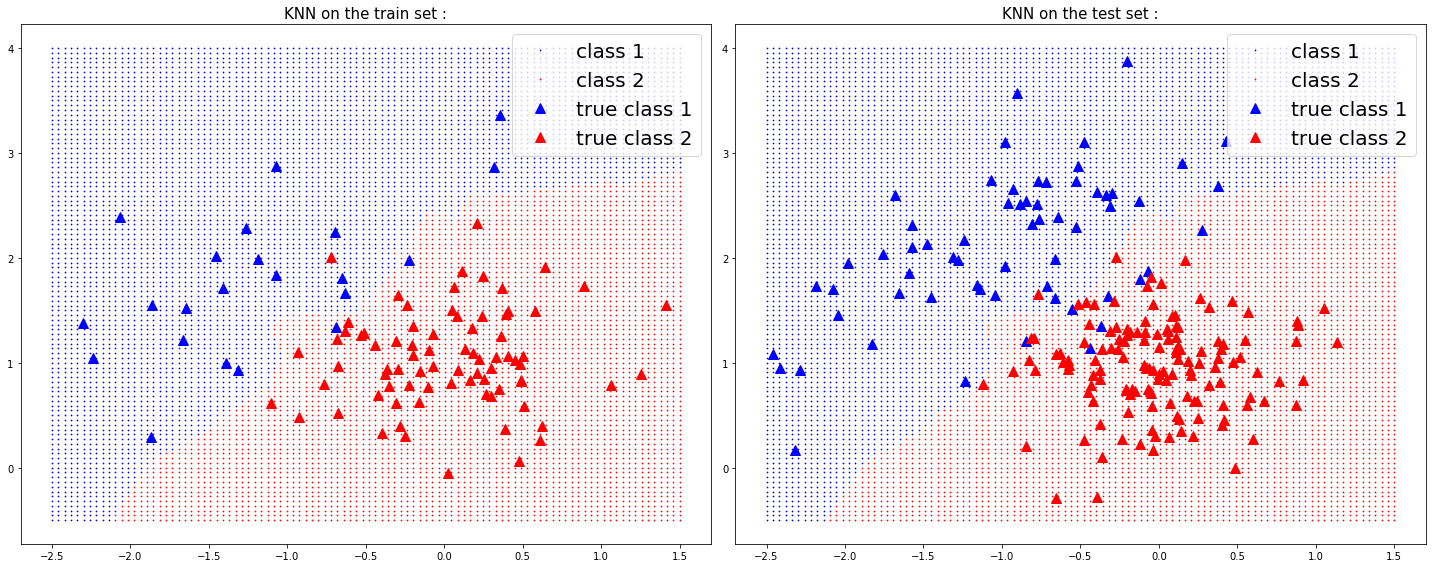

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(121)
#Plotting both regions of decision :
plt.plot(class_L1[:,1], class_L1[:,2], 'b.', markersize = 1.5,label='class 1')
plt.plot(class_L2[:,1], class_L2[:,2], 'r.', markersize = 1.5,label='class 2')
#Plotting the true values for the train set : 
plt.plot(train1[:,1],train1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(train2[:,1], train2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')
plt.title('KNN on the train set :',size=15)
plt.legend(prop={'size': 20})

plt.subplot(122)
#Plotting both regions of decision :
plt.plot(class_L1[:,1], class_L1[:,2], 'b.', markersize = 1.5,label='class 1')
plt.plot(class_L2[:,1], class_L2[:,2], 'r.', markersize = 1.5,label='class 2')
#Plotting the true values for the test set : 
plt.plot(test1[:,1],test1[:,2], 'b.', markersize = 10, marker = '^',label='true class 1')
plt.plot(test2[:,1], test2[:,2], 'r.', markersize = 10, marker = '^', label='true class 2')
plt.title('KNN on the test set :',size=15)
plt.legend(prop={'size': 20})

plt.tight_layout()
plt.show()

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




### LDA with scikit-learn :

In [31]:
#We define the matrix of features for the training set and the vector of targets :
X_train=train[:,1:]
y_train=train[:,0]
#Defining the same thing for the test set : 
X_test=test[:,1:]
y_test=test[:,0]

In [32]:
#defining the model : 
model = LDA()
#fitting accroding to the model :
model.fit(X_train, y_train)  
#LDA(n_components=None, priors=None, shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)
y_test_pred_LDA_sk = model.predict(X_test)

**Error rate** 

**1) On the test set for LDA with scikit-learn:**

In [33]:
error_LDA_sk_test=0
for i in range(y_test.shape[0]):
    if y_test[i] != y_test_pred_LDA_sk[i]:
        error_LDA_sk_test+=1
error_rate_LDA_sk_test= error_LDA_sk_test/y_test.shape[0]
print('Error rate for LDA with sickit-learn on the test set : ',error_rate_LDA_sk_test)

Error rate for LDA with sickit-learn on the test set :  0.055


**2) On the train set for LDA with scikit-learn:**

In [34]:
#Predicting with LDA on the train set :
y_train_pred_LDA_sk = model.predict(X_train)

In [35]:
error_LDA_sk_train=0
for i in range(y_train.shape[0]):
    if y_train[i] != y_train_pred_LDA_sk[i]:
        error_LDA_sk_train+=1
error_rate_LDA_sk_train= error_LDA_sk_train/y_train.shape[0]
print('Error rate for LDA with scikit-learn on the training set : ',error_rate_LDA_sk_train)

Error rate for LDA with scikit-learn on the training set :  0.03


### QDA with scikit-learn :

In [36]:
#defining the model : 
model = QDA()
#fitting accroding to the model :
model.fit(X_train, y_train)
y_test_pred_QDA_sk = model.predict(X_test)

**Error rate**

**1) On the test set for QDA with scikit-learn :**

In [37]:
error_QDA_sk_test=0
for i in range(y_test.shape[0]):
    if y_test[i] != y_test_pred_QDA_sk[i]:
        error_QDA_sk_test+=1
error_rate_QDA_sk_test= error_QDA_sk_test/y_test.shape[0]
print('Error rate for QDA with scikit-learn on the test set : ', error_rate_QDA_sk_test)

Error rate for QDA with scikit-learn on the test set :  0.05


**2) On the train set for QDA with scikit-learn :**

In [38]:
#Predicting with QDA on the training set :
y_train_pred_QDA_sk = model.predict(X_train)

In [39]:
error_QDA_sk_train=0
for i in range(y_train.shape[0]):
    if y_train[i] != y_train_pred_QDA_sk[i]:
        error_QDA_sk_train+=1
error_rate_QDA_sk_train= error_QDA_sk_train/y_train.shape[0]
print('Error rate for QDA with scikit-learn on the training set : ', error_rate_QDA_sk_train)

Error rate for QDA with scikit-learn on the training set :  0.05


## Comparing all the results : 

Plotting LDA, QDA, KNN, LDA with scikit-learn, QDA with scikit-learn and their error rates/confusion matrices :

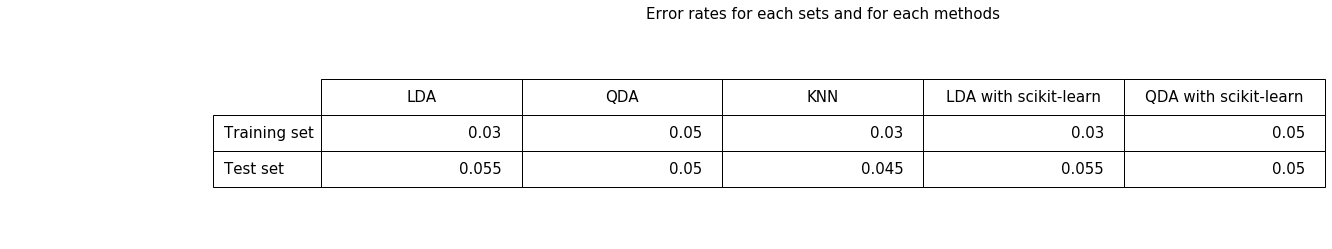

In [40]:
#plotting each error rate for each method :
collabel=("LDA", "QDA","KNN","LDA with scikit-learn","QDA with scikit-learn")
rowlabels=("Training set","Test set")
results_data=[[error_rate_LDA_train,error_rate_QDA_train,error_rate_KNN_train,error_rate_LDA_sk_train,error_rate_QDA_sk_train],
              [error_rate_LDA_test,error_rate_QDA_test,error_rate_KNN_test,error_rate_LDA_sk_test,error_rate_QDA_sk_test]]
plt.axis('tight')
plt.axis('off')
the_table = plt.table(cellText=results_data,colLabels=collabel,rowLabels=rowlabels,loc='center')
plt.title('Error rates for each sets and for each methods',size=15)
#Setting the font size in the table :
the_table.set_fontsize(44)
the_table.scale(3, 3) 
plt.show()

### Comments : 
- As expected, the results on the training set are better than those on the test set. 
- We got better results with LDA than with QDA
- Suprisingly, we got the same results as sickit-learn 
- On the overall results on the error rates for the train set and the test set, the better results were obtained with KNN with K=3. 
- The error rate on the training set is not 0 (even if the set we trained on and the set we tested on are the same) because the sets were not linearly separable.
- To have better results, we could have constructed new features from the features we have to make data linearly (or 'quadraticly') separable, to try to have an error rate closer to zero. 